Load the needed Libraries and data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_data = pd.read_csv("Downloads/train.csv")
test_data = pd.read_csv("Downloads/test.csv")

In [5]:
train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


#Exploratory Data Analysis

In [7]:
train_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [9]:
import seaborn as sns

In [11]:
print("Train Data Summary Statistics:")
print(train_data.describe())

Train Data Summary Statistics:
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min   

In [ ]:

print("\nTest Data Summary Statistics:")
print(test_data.describe())


Test Data Summary Statistics:
                id         day     pressure     maxtemp  temparature  \
count   730.000000  730.000000   730.000000  730.000000   730.000000   
mean   2554.500000  183.000000  1013.503014   26.372466    23.963288   
std     210.877136  105.438271     5.505871    5.672521     5.278098   
min    2190.000000    1.000000  1000.000000    7.400000     5.900000   
25%    2372.250000   92.000000  1008.725000   21.600000    19.825000   
50%    2554.500000  183.000000  1012.700000   27.800000    25.650000   
75%    2736.750000  274.000000  1017.600000   31.000000    28.375000   
max    2919.000000  365.000000  1032.200000   35.800000    31.800000   

          mintemp    dewpoint    humidity       cloud    sunshine  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean    22.110274   20.460137   82.669863   76.360274    3.664384   
std      5.170744    5.391169    7.818714   17.934121    3.639272   
min      4.200000   -0.000000   39.000000   

In [13]:

print("\nRainfall Distribution in Train Data:")
print(train_data['rainfall'].value_counts())




Rainfall Distribution in Train Data:
rainfall
1    1650
0     540
Name: count, dtype: int64



Correlation Matrix for Train Data:
                     id       day  pressure   maxtemp  temparature   mintemp  \
id             1.000000  0.153065 -0.008235  0.012590     0.014307  0.018708   
day            0.153065  1.000000  0.005337  0.146294     0.153590  0.161475   
pressure      -0.008235  0.005337  1.000000 -0.800499    -0.816531 -0.814453   
maxtemp        0.012590  0.146294 -0.800499  1.000000     0.982932  0.965529   
temparature    0.014307  0.153590 -0.816531  0.982932     1.000000  0.987150   
mintemp        0.018708  0.161475 -0.814453  0.965529     0.987150  1.000000   
dewpoint       0.006797  0.137929 -0.817008  0.906703     0.933617  0.941342   
humidity      -0.029042 -0.074048 -0.119949 -0.072615    -0.025016  0.009891   
cloud          0.002226 -0.048175  0.098600 -0.289047    -0.249355 -0.219399   
sunshine      -0.003022  0.060936 -0.257163  0.452387     0.414019  0.379497   
winddirection -0.004223  0.024800 -0.643293  0.662235     0.668963  0.663828   
wind

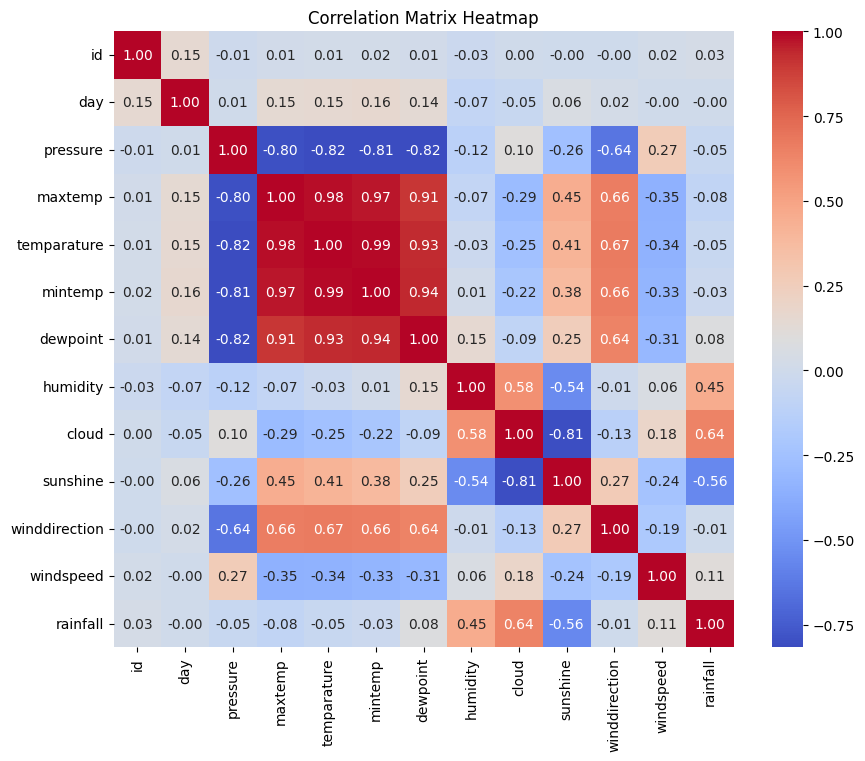

In [14]:

print("\nCorrelation Matrix for Train Data:")
print(train_data.corr())


plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Model Building

In [15]:
X = train_data.drop('rainfall', axis = 1)
y = train_data.rainfall

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state= 123)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
## Model Selection and Training, Using Ensemble Learning
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model 1: Logistic Regression
model1 = LogisticRegression(max_iter=2500, class_weight='balanced')

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Model 3: Support Vector Classifier
model3 = SVC(probability=True, class_weight='balanced')

# Model 4: Gradient Boosting Classifier
model4 = GradientBoostingClassifier(n_estimators=100)

model5 = KNeighborsClassifier(n_neighbors=10)

# Ensemble Model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', model1), 
        ('rf', model2), 
        ('svc', model3), 
        ('gb', model4), 
        ('knn', model5)
    ],
    voting='soft' 
)

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")

Accuracy: 0.87
F1 Score: 0.92
Recall: 0.97
Precision: 0.87


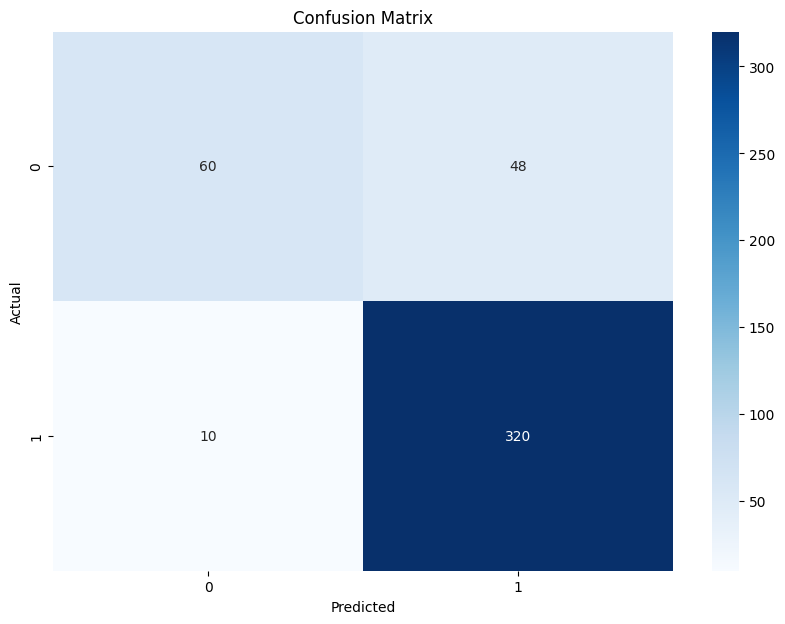

In [21]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.56      0.67       108
           1       0.87      0.97      0.92       330

    accuracy                           0.87       438
   macro avg       0.86      0.76      0.80       438
weighted avg       0.87      0.87      0.86       438



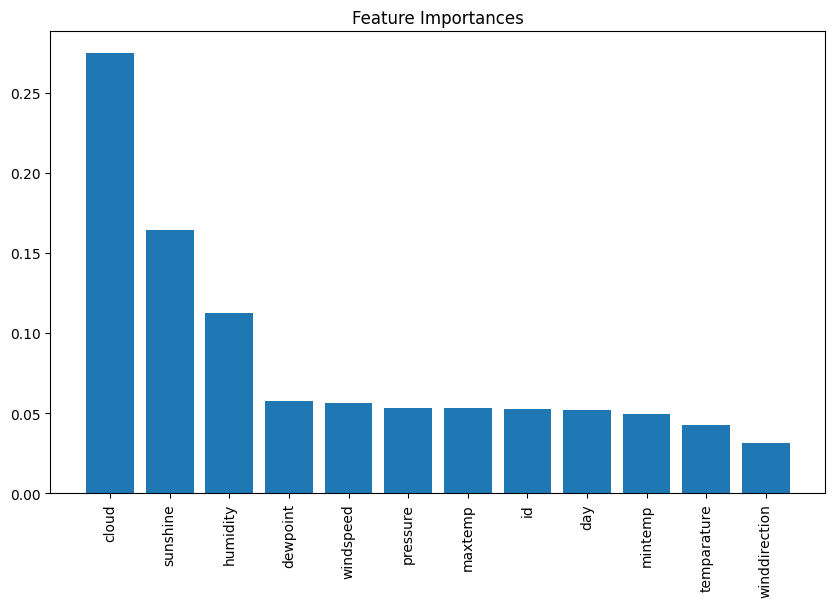

In [23]:
# Feature Importance
importances = ensemble_model.named_estimators_['rf'].feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [26]:
test_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [29]:
test_data.fillna(method='bfill', inplace=True)

C:\Users\sulto\AppData\Local\Temp\ipykernel_18844\641003942.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='bfill', inplace=True)


In [ ]:
# Save 'id' separately
test_ids = test_data['id']
X_test = test_data[X_train.columns]  # Keep only training features

# Scale the features
X_test_scaled = scaler.transform(X_test)

# Predict probabilities
y_test_pred = ensemble_model.predict_proba(X_test_scaled)[:, 1]  # Keep probability of class 1

# Create output with 'id'
output = pd.DataFrame({'id': test_ids, 'rainfall': y_test_pred})

# Save to CSV
output.to_csv('features.csv', index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


c:\Users\sulto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\sulto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\sulto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sulto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\sulto\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
y_test_pred[0:10]  # Display first 10 predictions

array([0.48513241, 0.48439613, 0.47472292, 0.44460267, 0.43169038,
       0.46953846, 0.47770957, 0.47735646, 0.47607718, 0.45984535])

#Leaderboard submission
86%